<img src='../img/EU-Copernicus-EUM_3Logos.png' alt='Logo EU Copernicus EUMETSAT' align='right' width='50%'></img>

<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./212_Metop-AB_GOME-2_NO2Tropo_L2_preprocess.ipynb"><< 212 - Metop-A/B GOME-2 - Tropospheric NO<sub>2</sub> - Level 2 - Pre-processing </a><span style="float:right;"><a href="./214_Metop-ABC_GOME-2_AAI_L3_load_browse.ipynb">214 - Metop-A/B/C GOME-2 - Absorbing Aerosol Index - Level 3 >></a></span>

<div class="alert alert-block alert-success">
<b>20 - DATA DISCOVERY</b></div>

<div class="alert alert-block alert-success">

<b>SEE ALSO</b>

* **30 - CASE STUDIES**
  - [321 - Metop-A/B GOME-2 - Tropospheric NO<sub>2</sub> map and time-series - Level 3](../30_case_studies/321_air_pollution_map_time-series_Metop-AB_GOME-2_NO2Tropo_L3.ipynb)
  - [323 - Air pollution - Tropospheric NO<sub>2</sub> anomaly map - Metop-A/B GOME-2 - Level 2](../30_case_studies/323_air_pollution_map_europe_2020_Metop-AB_GOME-2_NO2Tropo_L2.ipynb)
  - [324 - Air pollution - Tropospheric NO<sub>2</sub> time-series analysis - Metop-A/B GOME-2 - Level 2](../30_case_studies/324_air_pollution_time-series_europe_2020_Metop-AB_GOME-2_NO2Tropo_L2.ipynb)


</div>

<hr>

# 2.1.3 Metop-A/B GOME-2 - Tropospheric NO<sub>2</sub> - Level 3

Metop-A/B GOME-2 data records are monthly aggregated products (Level 3), regridded onto a regular latitude longitude grid. Data records are disseminated in the data format `netCDF`. 

Data records are processed for three parameters:

* `tropospheric ozone column`, 
* `total and tropospheric nitrogen dioxide column`, and 
* `total water vapour column`.

This notebook guides you through how the data can be loaded and gives basic plotting examples.

#### Module outline:
* [1 - Load and browse Metop-A/B GOME-2 data records](#load_l3)
* [2 - Plotting example of Metop-A/B GOME-2 Level 3 data](#plotting)

#### Load required libraries

In [1]:
import os
from netCDF4 import Dataset
import xarray as xr
import numpy as np
import pandas as pd
import datetime

# Python libraries for visualisation
from matplotlib import pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [34]:
%run ../functions.ipynb

<hr>

## <a id="load_l3"></a>Load and browse Metop-A/B GOME-2 data records (Level 3)

[xarray](http://xarray.pydata.org/en/stable/) is a Python library that makes it easy to load and browse data who are disseminated in the `NetCDF` format.

### Open NetCDF files with `xarray`

#### Open one individual file with `xarray`

By using xarray's `open_dataset()` function, one individual `netCDF` file can be loaded to create a new `xarray.Dataset`. Let us load a Level 3 data file for Nitrogen Dioxide for January 2017 and let us inspect the resulting `xarray.Dataset` and the `latitude` and `longitude` coordinates.

In [2]:
ds = xr.open_dataset('../eodata/gome2/level3/no2/GOME_NO2_Global_201701_METOPB_DLR_v1.nc')
ds, ds.latitude, ds.longitude

(<xarray.Dataset>
 Dimensions:    (latitude: 720, longitude: 1440)
 Coordinates:
   * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
   * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
 Data variables:
     *empty*
 Attributes:
     description:  Level 3 NO2 data
     Conventions:  CF-1.6,
 <xarray.DataArray 'latitude' (latitude: 720)>
 array([-89.875, -89.625, -89.375, ...,  89.375,  89.625,  89.875],
       dtype=float32)
 Coordinates:
   * latitude  (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
 Attributes:
     standard_name:  latitude
     long_name:      latitude_Centre, center of the grid box
     units:          degrees_north,
 <xarray.DataArray 'longitude' (longitude: 1440)>
 array([-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
       dtype=float32)
 Coordinates:
   * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
 Attributes:
     standard_name:  longitude
     

<br>

You see that the `data variable` section of the loaded `xarray.Dataset` is empty. This is due to the internal structure of the Metop-A/B GOME-2 Level 3 data. The data is organised in groups within the `netCDF` file. To load from a group, you have to pass the `group='PRODUCT'` as keyword to the `open_dataset()` function. 

If you do this, you can see that the `Dataset` contains six data variables:

* (1) `NO2total`, 
* (2) `NO2total_err`, 
* (3) `NO2total_stddev`, 
* (4) `NO2trop`,
* (5) `NO2trop_err`,
* (6) `NO2trop_stddev`

However, `latitude` and `longitude` do not contain any coordinates.

In [3]:
no2 = xr.open_dataset('../eodata/gome2/level3/no2/GOME_NO2_Global_201701_METOPB_DLR_v1.nc', group='PRODUCT')
no2

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440)
Dimensions without coordinates: latitude, longitude
Data variables:
    NO2total         (latitude, longitude) float32 ...
    NO2total_err     (latitude, longitude) float32 ...
    NO2total_stddev  (latitude, longitude) float32 ...
    NO2trop          (latitude, longitude) float32 ...
    NO2trop_err      (latitude, longitude) float32 ...
    NO2trop_stddev   (latitude, longitude) float32 ...
    nobs             (latitude, longitude) float32 ...

You can use the xarray function `assign_coords` to assign the coordinate values from your dataset to the dimensions of the `no2` data object.

In [4]:
no2_assigned = no2.assign_coords(latitude=ds.latitude, longitude=ds.longitude)
no2_assigned

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440)
Coordinates:
  * latitude         (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude        (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
Data variables:
    NO2total         (latitude, longitude) float32 ...
    NO2total_err     (latitude, longitude) float32 ...
    NO2total_stddev  (latitude, longitude) float32 ...
    NO2trop          (latitude, longitude) float32 ...
    NO2trop_err      (latitude, longitude) float32 ...
    NO2trop_stddev   (latitude, longitude) float32 ...
    nobs             (latitude, longitude) float32 ...

#### Open multiple netCDF files with `xarray`

xarray's `open_mfdataset()` function is very useful to load multiple netCDF files simultaneously. This function automatically concatenates and merges multiple files into a single xarray dataset. The behaviour of `xr.open_mfdataset` is the same as the one of `xr.open_dataset`. In order to access the dataset variables, you have to specify the `group` parameter. 

Additionally, if the dimension you wish to concatenate the individual files on is not defined in the original dataset, a new dimension can be defined by specifying the `concat_dim` key. Let us define `time` as the dimension the files shall be concatenated on.

In [5]:
mf_dataset = xr.open_mfdataset('../eodata/gome2/level3/no2/*.nc', concat_dim='time', combine='nested',  group='PRODUCT')
mf_dataset


<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440, time: 130)
Dimensions without coordinates: latitude, longitude, time
Data variables:
    NO2total         (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_err     (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_stddev  (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop          (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_err      (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_stddev   (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    nobs             (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>

The resulting `xarray.Dataset` has three dimensions (`latitude`, `longitude` and `time`). With `assign_coords` you can assign the right coordinate values to the dimensions. You can use again the `ds` xarray.Dataset you defined at the beginning. 

With the help of Python's [pandas](https://pandas.pydata.org/) library, you can create efficiently a list of monthly time values, which can be assigned to the time dimension.

In [6]:
# Build list of time coordinates with pandas
time_coords = pd.date_range('2007-02', '2017-11', freq='MS').strftime("%Y-%m").tolist()

# Assign values to Dataset dimension
mf_dataset_assigned = mf_dataset.assign_coords(latitude=ds.latitude, longitude=ds.longitude, time=time_coords)
mf_dataset_assigned

<xarray.Dataset>
Dimensions:          (latitude: 720, longitude: 1440, time: 130)
Coordinates:
  * latitude         (latitude) float32 -89.88 -89.62 -89.38 ... 89.62 89.88
  * longitude        (longitude) float32 -179.9 -179.6 -179.4 ... 179.6 179.9
  * time             (time) <U7 '2007-02' '2007-03' ... '2017-10' '2017-11'
Data variables:
    NO2total         (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_err     (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2total_stddev  (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop          (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_err      (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    NO2trop_stddev   (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>
    nobs             (time, latitude, longitude) float32 dask.array<chunksize=(1, 720, 1440), meta=np.ndarray>

<br>

## <a id="plotting"></a>Plotting example of Metop-A/B GOME-2 Level 3 data

The last step is to visualize one time step of the created data object. Since the data are arranged on a regular grid, you can make use of the `pcolormesh` function of Pyton's plotting library [matplotlib](https://matplotlib.org/).

As before, you can make use of Cartopy's features and create a basemap in a `PlateCarree` projection. You can add coast- and gridlines. The NO<sub>2</sub> values are added as colored data values onto a regular grid with matplotlib's `pcolormesh` function. As you might need to re-use the code for plotting, we define a plotting function called [visualize_pcolormesh](../functions.ipynb#visualize_pcolormesh).


Let us say, you want to plot the monthly averaged values of `Tropospheric Nitrogen Dioxide` for month November 2017. Before you can visualize it, you have to select the variable `NO2trop` from the `xarray.Dataset` *mf_dataset_assigned* you defined above.

Further, you can select the month you wish to visualize by selecting the specific month of the time dimension.

In [36]:
no2_da = mf_dataset_assigned.NO2trop

no2_201711 = no2_da[129,:,:]
no2_201711

<xarray.DataArray 'NO2trop' (latitude: 720, longitude: 1440)>
dask.array<getitem, shape=(720, 1440), dtype=float32, chunksize=(720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
    time       <U7 '2017-11'
Attributes:
    long_name:      Tropospheric Column NO2 content
    units:          molec cm-2
    standard_name:  troposphere_mole_content_of_nitrogen_dioxide

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'Tropospheric Column NO2 content'}>)

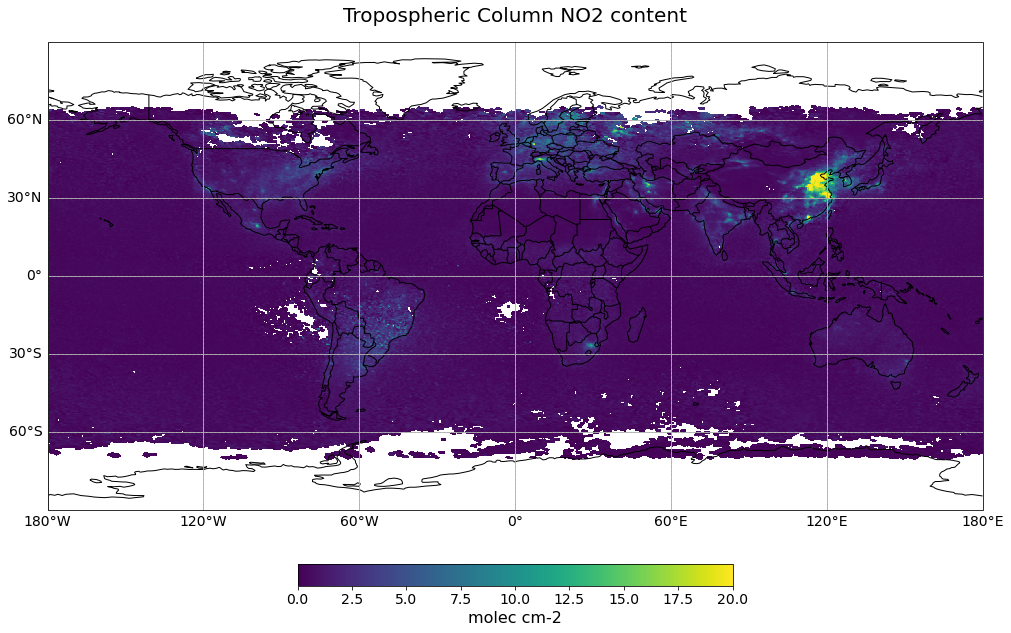

In [37]:
visualize_pcolormesh(data_array=no2_201711*1e-15, 
                     longitude=no2_201711.longitude, 
                     latitude=no2_201711.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='viridis', 
                     unit=no2_201711.units, 
                     long_name=no2_201711.long_name, 
                     vmin=0, 
                     vmax=20, 
                     lonmin=no2_201711.longitude.min(), 
                     lonmax=no2_201711.longitude.max(), 
                     latmin=no2_201711.latitude.min(), 
                     latmax=no2_201711.latitude.max(), 
                     set_global=True)


<br>

<a href="../00_index.ipynb"><< Index</a><br>
<a href="./212_Metop-AB_GOME-2_NO2Tropo_L2_preprocess.ipynb"><< 212 - Metop-A/B GOME-2 - Tropospheric NO<sub>2</sub> - Level 2 - Pre-processing </a><span style="float:right;"><a href="./214_Metop-ABC_GOME-2_AAI_L3_load_browse.ipynb">214 - Metop-A/B/C GOME-2 - Absorbing Aerosol Index - Level 3 >></a></span>

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>